# **Proyek UTS - Review Netflix Series 'Squid Game'**

# Import File & Read .csv

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Review Squid Game.csv to Review Squid Game.csv


In [ ]:
import pandas as pd 
import io

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['Review Squid Game.csv']))
print(df)

    Jenis Review  ...                                             Review
0       Positive  ...  I know korea is still a mysoginistic society u...
1       Positive  ...  The show was AMAZING! the way I was crying for...
2       Positive  ...  Squid Game was truly something else. I expecte...
3         Netral  ...  It's competent in most aspects. The hype hones...
4       Positive  ...  yeah. Worth the hype. I wasn't wowed by the fi...
..           ...  ...                                                ...
148     Positive  ...  Aside from the politics, great watch! The orig...
149     Positive  ...  Absolutely brilliant. Great writing, every dam...
150       Netral  ...  It's good, but not THAT good to justify all th...
151     Positive  ...                               Awesome! bingwatched
152     Positive  ...  Honestly, I didn't know what to expect from th...

[153 rows x 3 columns]


# Scatter Text & Data Visualization

## **Instalasi**

In [ ]:
pip install scattertext

     |████████████████████████████████| 7.3 MB 2.5 MB/s 
     |████████████████████████████████| 24.1 MB 2.7 kB/s 
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9310 sha256=f0b35bcb240bbd10a8afa3d84c0711f5554abf06fd96d9d9b266b8b39abf377f
  Stored in directory: /root/.cache/pip/wheels/cb/19/58/4e8fdd0009a7f89dbce3c18fff2e0d0fa201d5cdfd16f113b7
Successfully built flashtext
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


## **Import Library**

In [ ]:
%matplotlib inline
import scattertext as st
import re, io
from pprint import pprint
import pandas as pd
import numpy as np
from scipy.stats import rankdata, hmean, norm
import spacy
import os, pkgutil, json, urllib
from urllib.request import urlopen
from IPython.display import IFrame
from IPython.core.display import display, HTML
from scattertext import CorpusFromPandas, produce_scattertext_explorer
display(HTML("<style>.container { width:98% !important; }</style>"))


## **Load Spacy**

In [ ]:
import spacy
nlp = spacy.load('en')

## **Lihat Data**

In [ ]:
df.head()

,Jenis Review,Username,Review
0,Positive,Laliscufer82098,I know korea is still a mysoginistic society u...
1,Positive,Shwetha Sriram,The show was AMAZING! the way I was crying for...
2,Positive,FizzyPopp,Squid Game was truly something else. I expecte...
3,Netral,Jan Pospisil,It's competent in most aspects. The hype hones...
4,Positive,kdramakitty,yeah. Worth the hype. I wasn't wowed by the fi...


In [ ]:
df.tail()

,Jenis Review,Username,Review
148,Positive,Arleen A,"Aside from the politics, great watch! The orig..."
149,Positive,SolidSnakeLRRP R,"Absolutely brilliant. Great writing, every dam..."
150,Netral,Rafa,"It's good, but not THAT good to justify all th..."
151,Positive,Eli A,Awesome! bingwatched
152,Positive,Ren S,"Honestly, I didn't know what to expect from th..."


In [ ]:
df[['Review']]

,Review
0,I know korea is still a mysoginistic society u...
1,The show was AMAZING! the way I was crying for...
2,Squid Game was truly something else. I expecte...
3,It's competent in most aspects. The hype hones...
4,yeah. Worth the hype. I wasn't wowed by the fi...
...,...
148,"Aside from the politics, great watch! The orig..."
149,"Absolutely brilliant. Great writing, every dam..."
150,"It's good, but not THAT good to justify all th..."
151,Awesome! bingwatched


## **Parse Speech txt using Spacy**

In [ ]:
df['parsed'] = df.Review.apply(nlp)

In [ ]:
df.head()

,Jenis Review,Username,Review,parsed
0,Positive,Laliscufer82098,I know korea is still a mysoginistic society u...,"(I, know, korea, is, still, a, mysoginistic, s..."
1,Positive,Shwetha Sriram,The show was AMAZING! the way I was crying for...,"(The, show, was, AMAZING, !, the, way, I, was,..."
2,Positive,FizzyPopp,Squid Game was truly something else. I expecte...,"(Squid, Game, was, truly, something, else, ., ..."
3,Netral,Jan Pospisil,It's competent in most aspects. The hype hones...,"(It, 's, competent, in, most, aspects, ., The,..."
4,Positive,kdramakitty,yeah. Worth the hype. I wasn't wowed by the fi...,"(yeah, ., Worth, the, hype, ., I, was, n't, wo..."


## **Count of Positive, Negative, and Neutral Jenis Review**

In [ ]:
print("Document Count")
print(df.groupby('Jenis Review')['Review'].count())
print("Word Count")
df.groupby('Jenis Review').apply(lambda x: x.Review.apply(lambda x: len(x.split())).sum())

Document Count
Jenis Review
Negative    46
Netral      40
Positive    67
Name: Review, dtype: int64
Word Count


Jenis Review
Negative    3816
Netral      2568
Positive    6069
dtype: int64

## **Convert Dataframe into Scattertext Corpus**

In [ ]:
corpus = st.CorpusFromParsedDocuments(df, category_col='Jenis Review', parsed_col='parsed').build()

In [ ]:
print(corpus)

## **Visualize Chart**

In [ ]:
html = produce_scattertext_explorer(corpus,category='Positive',category_name='Positive', not_category_name='Negative and Neutral',width_in_pixels=1000, minimum_term_frequency=5,metadata= df['Username'])
file_name = 'ScatterTextScale.html'
open(file_name, 'wb').write(html.encode('utf-8'))
IFrame(src=file_name, width = 1200, height=700)

In [ ]:
html = st.produce_scattertext_explorer(corpus,
                                       category='Positive',
                                       category_name='Positive',
                                       not_category_name='Negative and Neutral',
                                       minimum_term_frequency=5,
                                       width_in_pixels=1000,
                                       transform=st.Scalers.log_scale_standardize)
file_name = 'ScattertextLog.html'
open(file_name, 'wb').write(html.encode('utf-8'))
IFrame(src=file_name, width = 1200, height=700)

In [ ]:
html = produce_scattertext_explorer(corpus,
                                    category='Positive',
                                    category_name='Positive',
                                    not_category_name='Negative and Neutral',
                                    width_in_pixels=1000,
                                    minimum_term_frequency=5,
                                    transform=st.Scalers.percentile,
                                    metadata=df['Username'])
file_name = 'ScattertextRankData.html'
open(file_name, 'wb').write(html.encode('utf-8'))
IFrame(src=file_name, width = 1200, height=700)

# Text Processing NLTK & Word Cloud

## **Install & Import Library NLTK**

In [ ]:
!pip install nltk==3.5

     |████████████████████████████████| 1.4 MB 3.1 MB/s 
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434693 sha256=87ae0c681f42da9e0af2e282887e082fafc6c9723d997a1472e07327113ae550
  Stored in directory: /root/.cache/pip/wheels/45/6c/46/a1865e7ba706b3817f5d1b2ff7ce8996aabdd0d03d47ba0266
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## **Case Folding**

In [ ]:
review = df[['Review']]

In [ ]:
text_review = [str(i) for i in review.values]

In [ ]:
paragraph = " ".join(text_review)
paragraph

'[\'I know korea is still a mysoginistic society until now because there government doesnt want women to have power and more equal rights than men and thats the sad truth of the society, but judging the story it felt flat for me the beginning episodes are great BUT after episode 5 it felt DRAGGY and SLOW and i get the betrayal of friends part but i think it feels so injustice of the other characters especially Ali they didi him dirty and still koreans always look down dark or brown skinned people i hate it here and still racist to foreigners ngl though and the ending is still open ended so weed a 2nd season to answer all the several plotholes of previous episodes. Acting is PHENOMENAL HANDS DOWN especially SAEBYEOK i love her role in this its giving me katnis everdeen vibes heheheh purr and GIHUN too i love his kind honest protagonist and especially the front man i love villainess of the characters, high budget production, outfits stages evrything: felt flat for the OST i need lisas mo

In [ ]:
lower_Review = paragraph.lower()
lower_Review

'[\'i know korea is still a mysoginistic society until now because there government doesnt want women to have power and more equal rights than men and thats the sad truth of the society, but judging the story it felt flat for me the beginning episodes are great but after episode 5 it felt draggy and slow and i get the betrayal of friends part but i think it feels so injustice of the other characters especially ali they didi him dirty and still koreans always look down dark or brown skinned people i hate it here and still racist to foreigners ngl though and the ending is still open ended so weed a 2nd season to answer all the several plotholes of previous episodes. acting is phenomenal hands down especially saebyeok i love her role in this its giving me katnis everdeen vibes heheheh purr and gihun too i love his kind honest protagonist and especially the front man i love villainess of the characters, high budget production, outfits stages evrything: felt flat for the ost i need lisas mo

## **Tokenizing**

In [ ]:
import string 
import re #regex library
from nltk.tokenize import word_tokenize 

In [ ]:
#remove angka
lower_example = re.sub(r"\d+", "", lower_Review)
lower_example

'[\'i know korea is still a mysoginistic society until now because there government doesnt want women to have power and more equal rights than men and thats the sad truth of the society, but judging the story it felt flat for me the beginning episodes are great but after episode  it felt draggy and slow and i get the betrayal of friends part but i think it feels so injustice of the other characters especially ali they didi him dirty and still koreans always look down dark or brown skinned people i hate it here and still racist to foreigners ngl though and the ending is still open ended so weed a nd season to answer all the several plotholes of previous episodes. acting is phenomenal hands down especially saebyeok i love her role in this its giving me katnis everdeen vibes heheheh purr and gihun too i love his kind honest protagonist and especially the front man i love villainess of the characters, high budget production, outfits stages evrything: felt flat for the ost i need lisas mone

In [ ]:
#remove punctuation
lower_example = lower_example.translate(str.maketrans("","",string.punctuation))
lower_example

'i know korea is still a mysoginistic society until now because there government doesnt want women to have power and more equal rights than men and thats the sad truth of the society but judging the story it felt flat for me the beginning episodes are great but after episode  it felt draggy and slow and i get the betrayal of friends part but i think it feels so injustice of the other characters especially ali they didi him dirty and still koreans always look down dark or brown skinned people i hate it here and still racist to foreigners ngl though and the ending is still open ended so weed a nd season to answer all the several plotholes of previous episodes acting is phenomenal hands down especially saebyeok i love her role in this its giving me katnis everdeen vibes heheheh purr and gihun too i love his kind honest protagonist and especially the front man i love villainess of the characters high budget production outfits stages evrything felt flat for the ost i need lisas money fpr th

In [ ]:
#remove whitespace leading & trailing
lower_example = lower_example.strip()
lower_example

'i know korea is still a mysoginistic society until now because there government doesnt want women to have power and more equal rights than men and thats the sad truth of the society but judging the story it felt flat for me the beginning episodes are great but after episode  it felt draggy and slow and i get the betrayal of friends part but i think it feels so injustice of the other characters especially ali they didi him dirty and still koreans always look down dark or brown skinned people i hate it here and still racist to foreigners ngl though and the ending is still open ended so weed a nd season to answer all the several plotholes of previous episodes acting is phenomenal hands down especially saebyeok i love her role in this its giving me katnis everdeen vibes heheheh purr and gihun too i love his kind honest protagonist and especially the front man i love villainess of the characters high budget production outfits stages evrything felt flat for the ost i need lisas money fpr th

In [ ]:
#remove multiple whitespace into single whitespace
lower_example = re.sub('\s+',' ',lower_example)
lower_example

'i know korea is still a mysoginistic society until now because there government doesnt want women to have power and more equal rights than men and thats the sad truth of the society but judging the story it felt flat for me the beginning episodes are great but after episode it felt draggy and slow and i get the betrayal of friends part but i think it feels so injustice of the other characters especially ali they didi him dirty and still koreans always look down dark or brown skinned people i hate it here and still racist to foreigners ngl though and the ending is still open ended so weed a nd season to answer all the several plotholes of previous episodes acting is phenomenal hands down especially saebyeok i love her role in this its giving me katnis everdeen vibes heheheh purr and gihun too i love his kind honest protagonist and especially the front man i love villainess of the characters high budget production outfits stages evrything felt flat for the ost i need lisas money fpr the

In [ ]:
tokens = nltk.tokenize.word_tokenize(lower_example)

print('Tokenizing Result : \n') 
tokens

Tokenizing Result : 



['i',
 'know',
 'korea',
 'is',
 'still',
 'a',
 'mysoginistic',
 'society',
 'until',
 'now',
 'because',
 'there',
 'government',
 'doesnt',
 'want',
 'women',
 'to',
 'have',
 'power',
 'and',
 'more',
 'equal',
 'rights',
 'than',
 'men',
 'and',
 'thats',
 'the',
 'sad',
 'truth',
 'of',
 'the',
 'society',
 'but',
 'judging',
 'the',
 'story',
 'it',
 'felt',
 'flat',
 'for',
 'me',
 'the',
 'beginning',
 'episodes',
 'are',
 'great',
 'but',
 'after',
 'episode',
 'it',
 'felt',
 'draggy',
 'and',
 'slow',
 'and',
 'i',
 'get',
 'the',
 'betrayal',
 'of',
 'friends',
 'part',
 'but',
 'i',
 'think',
 'it',
 'feels',
 'so',
 'injustice',
 'of',
 'the',
 'other',
 'characters',
 'especially',
 'ali',
 'they',
 'didi',
 'him',
 'dirty',
 'and',
 'still',
 'koreans',
 'always',
 'look',
 'down',
 'dark',
 'or',
 'brown',
 'skinned',
 'people',
 'i',
 'hate',
 'it',
 'here',
 'and',
 'still',
 'racist',
 'to',
 'foreigners',
 'ngl',
 'though',
 'and',
 'the',
 'ending',
 'is',
 'stil

## **Frekuensi Kata**

In [ ]:
# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

In [ ]:
freq_tokens = nltk.FreqDist(tokens)

print('Frequency Tokens : \n') 
freq_tokens.most_common()

Frequency Tokens : 



[('the', 740),
 ('and', 374),
 ('a', 279),
 ('of', 262),
 ('to', 261),
 ('i', 254),
 ('it', 243),
 ('is', 217),
 ('this', 174),
 ('in', 169),
 ('that', 162),
 ('but', 161),
 ('was', 142),
 ('show', 119),
 ('for', 109),
 ('not', 95),
 ('you', 91),
 ('are', 89),
 ('its', 87),
 ('with', 76),
 ('series', 73),
 ('so', 71),
 ('all', 66),
 ('as', 65),
 ('just', 63),
 ('on', 62),
 ('have', 60),
 ('game', 57),
 ('like', 55),
 ('really', 54),
 ('be', 53),
 ('characters', 52),
 ('they', 51),
 ('about', 50),
 ('very', 48),
 ('good', 48),
 ('were', 48),
 ('there', 47),
 ('one', 47),
 ('if', 45),
 ('me', 44),
 ('some', 44),
 ('more', 42),
 ('or', 42),
 ('acting', 42),
 ('at', 42),
 ('people', 41),
 ('’', 40),
 ('from', 39),
 ('story', 38),
 ('character', 37),
 ('because', 36),
 ('episode', 36),
 ('games', 36),
 ('watch', 35),
 ('how', 35),
 ('out', 35),
 ('great', 34),
 ('my', 34),
 ('has', 33),
 ('get', 32),
 ('time', 32),
 ('what', 32),
 ('by', 32),
 ('well', 31),
 ('an', 31),
 ('ending', 30),
 ('

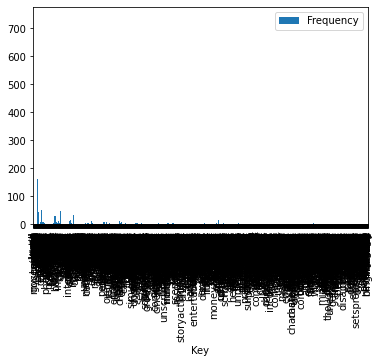

In [ ]:
import pandas as pd

df_freq_tokens = pd.DataFrame.from_dict(freq_tokens, orient='index')
df_freq_tokens.columns = ['Frequency']
df_freq_tokens.index.name = 'Key'

df_freq_tokens.plot(kind='bar')

## **Filtering**

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

# tokenize text
freq_tokens

list_stopwords = set(stopwords.words('english'))

#remove stopword pada list token
tokens_without_stopword = [word for word in freq_tokens if not word in list_stopwords]


tokens_without_stopword

['show',
 'series',
 'game',
 'like',
 'really',
 'characters',
 'good',
 'one',
 'acting',
 'people',
 '’',
 'story',
 'character',
 'episode',
 'games',
 'watch',
 'great',
 'get',
 'time',
 'well',
 'ending',
 'first',
 'dont',
 'much',
 'watching',
 'episodes',
 'end',
 'even',
 'many',
 'season',
 'squid',
 'see',
 'im',
 'lot',
 'korean',
 'better',
 'hype',
 'bad',
 'watched',
 'think',
 'way',
 'could',
 'know',
 'drama',
 'would',
 'make',
 'money',
 'also',
 'feel',
 'predictable',
 'still',
 'plot',
 'main',
 'everything',
 'life',
 'say',
 'netflix',
 'made',
 'development',
 'amazing',
 'actors',
 'definitely',
 'last',
 'entertaining',
 'pretty',
 'interesting',
 'didnt',
 'movie',
 'twists',
 'love',
 'something',
 'scenes',
 'movies',
 'world',
 'concept',
 'anyone',
 'far',
 'best',
 'find',
 'keep',
 'different',
 'tv',
 'shows',
 'seen',
 'new',
 'entire',
 'loved',
 'little',
 'left',
 'second',
 'makes',
 'worth',
 'ever',
 'ive',
 'nothing',
 'another',
 'cant',
 

In [ ]:
# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

## **Stemming**

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [ ]:
stemmer = PorterStemmer()

In [ ]:
# token without stopword
list_tokens = tokens_without_stopword

# stem
output   = [(token + " : " + stemmer.stem(token)) for token in list_tokens]

output

['show : show',
 'series : seri',
 'game : game',
 'like : like',
 'really : realli',
 'characters : charact',
 'good : good',
 'one : one',
 'acting : act',
 'people : peopl',
 '’ : ’',
 'story : stori',
 'character : charact',
 'episode : episod',
 'games : game',
 'watch : watch',
 'great : great',
 'get : get',
 'time : time',
 'well : well',
 'ending : end',
 'first : first',
 'dont : dont',
 'much : much',
 'watching : watch',
 'episodes : episod',
 'end : end',
 'even : even',
 'many : mani',
 'season : season',
 'squid : squid',
 'see : see',
 'im : im',
 'lot : lot',
 'korean : korean',
 'better : better',
 'hype : hype',
 'bad : bad',
 'watched : watch',
 'think : think',
 'way : way',
 'could : could',
 'know : know',
 'drama : drama',
 'would : would',
 'make : make',
 'money : money',
 'also : also',
 'feel : feel',
 'predictable : predict',
 'still : still',
 'plot : plot',
 'main : main',
 'everything : everyth',
 'life : life',
 'say : say',
 'netflix : netflix',
 'made

## **Text Visualization**

In [ ]:
text=''
for t in output: 
  text += str(t) + ' '

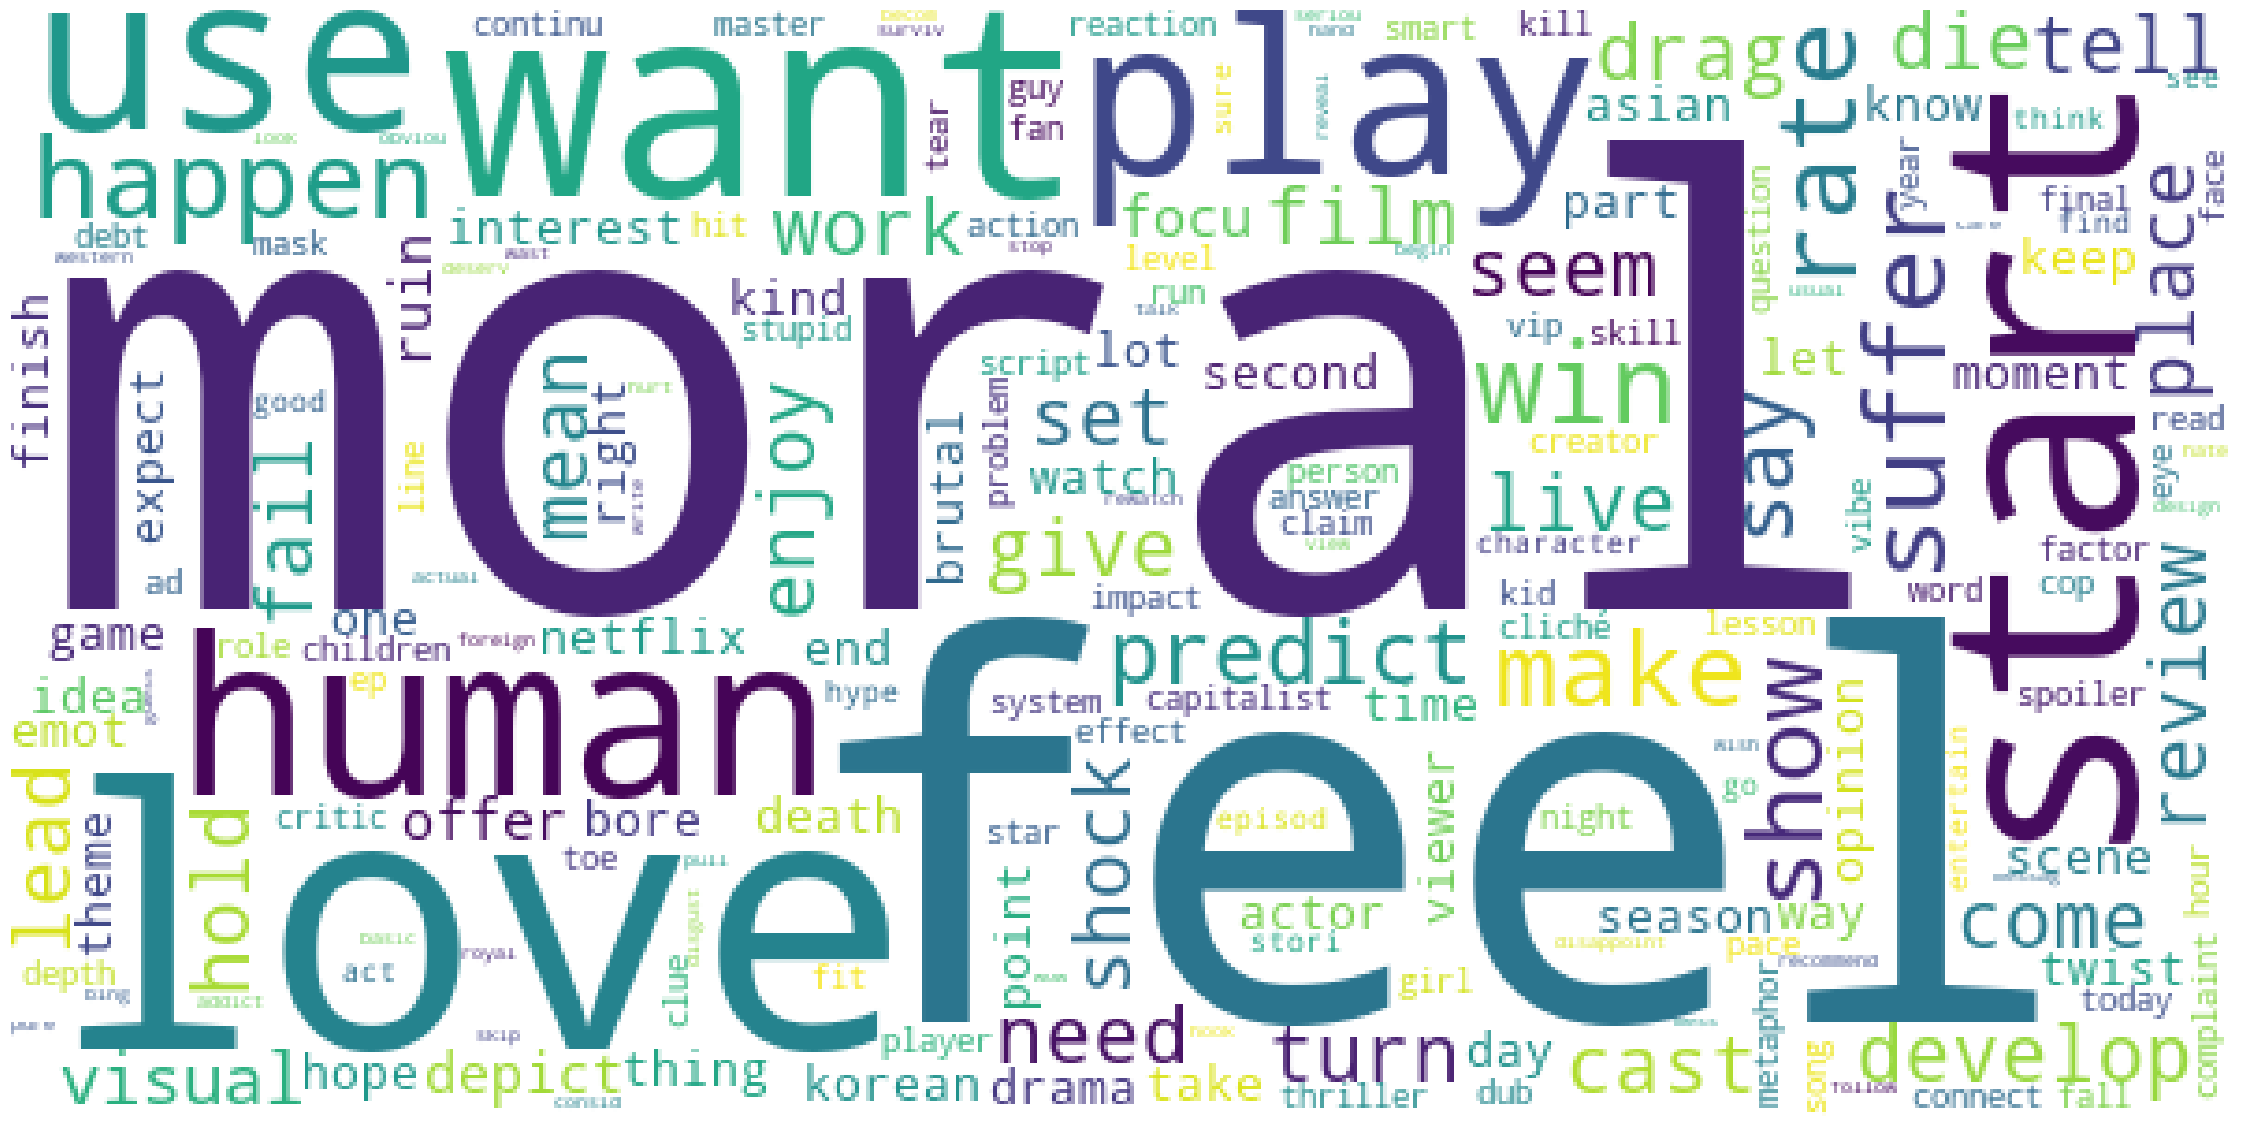

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
# stopwords is a collection of words that dont convey meaning. mostly pronouns such as he she etc.
wordcloud = WordCloud(width = 600, height = 300, random_state=1, background_color='white', collocations=False, stopwords = STOPWORDS).generate(text)
plt.figure(figsize=(40, 30))
# Display image
plt.imshow(wordcloud) 
# No axis 
plt.axis("off")
plt.show()